In [2]:
from pymongo import MongoClient
import pandas as pd 
import numpy as np

%matplotlib inline

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [3]:
np.random.seed(42)

In [4]:
client = MongoClient()
db = client['toxic_articles']
articles = list(db.articles.find({}))

In [5]:
articles_df = pd.DataFrame(articles)

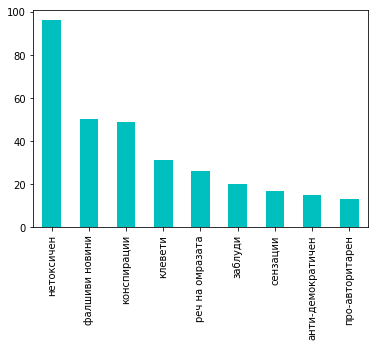

In [16]:
articles_df['label'].value_counts().plot(kind='bar',colors='c')

In [17]:
print(articles_df.shape)
print('avg text len', np.average(articles_df['text'].str.len()))
print('avg title len', np.average(articles_df['title'].str.len()))

(317, 11)
avg text len 3613.7066246056784
avg title len 70.47318611987382


In [21]:
def make_clf():
    return Pipeline([
        ('feats', FeatureUnion([
            ('lsa_title', Pipeline([
                ('selector', FunctionTransformer(lambda x: x['title'].tolist(), validate=False)),
                ('tfidf', TfidfVectorizer(min_df=2, stop_words=None)),
                ('dim_red', TruncatedSVD(15, random_state=0))
            ])),
            ('lsa_text', Pipeline([
                ('selector', FunctionTransformer(lambda x: x['text'].tolist(), validate=False)),
                ('tfidf', TfidfVectorizer(min_df=2, stop_words=None)),
                ('dim_red', TruncatedSVD(250, random_state=0))
            ])),
            
        ])),
        ('clf', LinearSVC(tol=0.01, C=3.5))
    ])

In [22]:
np.average(cross_val_score(make_clf(), articles_df, articles_df['label'], cv=5, scoring='accuracy'))

0.5400879943568652

In [ ]:
stop?

In [9]:
articles_df.head()

,_id,authors,label,link,media_info,origin,publish_date,text,title,translation
0,5cab3aefb7ddb24c08a4a1c5,[],фалшиви новини,https://www.vesti.bg/lyubopitno/sveji/vegani-o...,"{'editor': '', 'responsible_person': '', 'esta...",www.vesti.bg,NaT,И спанска двойка от Севиля - Марио Бостес и Ир...,Вегани осиновиха броколи в Испания - Любопитно,{'title': 'Vegans adopted broccoli in Spain - ...
1,5cab3af0b7ddb24c08a4a1c6,[],фалшиви новини,https://www.blitz.bg/analizi-i-komentari/skand...,"{'editor': '', 'responsible_person': '', 'esta...",www.blitz.bg,NaT,Бойко обича жените. Радан обича мъжете. Това е...,Скандална гей дружина клати България! Стига ве...,{'title': 'Scandalous gay band shakes Bulgaria...
2,5cab3af1b7ddb24c08a4a1c7,[],клевети,https://www.blitz.bg/obshtestvo/blskov-na-prot...,"{'editor': '', 'responsible_person': '', 'esta...",www.blitz.bg,NaT,"Протестите повече попречиха на хората, отколко...",Блъсков: На протестърите им бе плащано и това ...,{'title': 'Blaskov: Their protestors were paid...
3,5cab3af2b7ddb24c08a4a1c8,[],заблуди,https://www.blitz.bg/politika/tsik-obyavyava-g...,"{'editor': '', 'responsible_person': '', 'esta...",www.blitz.bg,NaT,Очаква се днес Централната избирателна комисия...,"ЦИК обявява голяма новина, на ход е Радев!","{'title': 'CEC announces big news, Radev moves..."
4,5cab3af2b7ddb24c08a4a1c9,[],реч на омразата,https://www.24chasa.bg/mnenia/article/7090368,"{'editor': 'Борислав Зюмбюлев', 'responsible_p...",www.24chasa.bg,NaT,Провинциалистките също са хора Убийството на ...,Виктория Маринова не трябва да бъде забравена,{'title': 'Victoria Marinova should not be for...


In [40]:
for a in articles:
    print(a['media_info']['popularity'])


16
17
17
17
40
40
56
59
59
59
59
89
89
150
156
156
156
156
158
202
202
213
251
270
270
270
270
303
318
355
355
369
414
429
429
436
436
440
482
482
496
514
514
514
537
537
565
565
565
565
625
625
663
663
703
744
765
825
825
825
857
944
944
981
996
996
999
999
1026
1080
1125
1164
1230
1850
1856
2336
2375
2610
2610
2641
2932
2950
2950
3166
3198
3198
3613
4132
4132
4657
5160
5160
5779
5797
6038
6054
6054
6164
6164
6164
6889
6906
6906
6906
6947
7064
7109
7376
7728
7728
7880
7983
8198
8198
8624
9117
9217
9312
9312
10718
10718
11069
11811
11811
11987
12325
12575
13197
14939
14939
14939
14984
16061
16061
16061
16875
17328
17868
17868
17868
17887
17887
17887
20346
25438
25438
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
34
91
103
120
125
125
125
125
127
240
240
240
240
341
419
468
546
624
1015
1015
1015
1015
1015
1074
1074
1074
1074
1234
1234
1234
1234
1234
1235
1264
1264
1264
1498
1498
1498

In [37]:
from datetime import datetime, date

def _get_days(established):
    established_date = datetime.strptime(established, '%Y-%m-%d')
    to_date = datetime(2019, 1, 1)

    return (to_date - established_date).days

In [38]:
_get_days('2015-01-01')

1461